In [1]:
import pyslammer as slam
import matplotlib.pyplot as plt
%matplotlib widget

In [18]:
histories = slam.sample_ground_motions()
ky = 0.15
motion = histories["Northridge_VSP-360"]
# motion = histories["Chi-Chi_1999_TCU068-090"]
dt = motion[0][1] - motion[0][0]
input_acc = motion[1] / 9.80665
da = slam.Decoupled(k_y=ky,
                    a_in=input_acc,
                    dt=dt,
                    height=50.0,
                    vs_slope=600.0,
                    vs_base=600.0,
                    damp_ratio=0.05,
                    ref_strain=0.0005,
                    soil_model="linear_elastic",
                    si_units=True,
                    lite=False)


da.run_sliding_analysis()
pga = max(abs(input_acc))


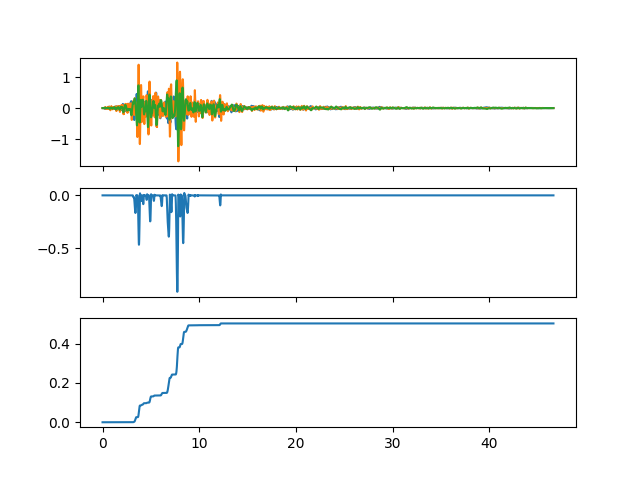

In [19]:
fig, ax = plt.subplots(3,1,sharex=True)
ax[0].plot(motion[0],-da.a_in)
ax[0].plot(motion[0],da.a_resp/9.81)
ax[0].plot(motion[0],da.HEA/9.81)
ax[1].plot(motion[0],da.block_vel)
ax[2].plot(motion[0],da.block_disp)

In [14]:
motion[0]

array([0.0000e+00, 5.0000e-03, 1.0000e-02, ..., 4.6620e+01, 4.6625e+01,
       4.6630e+01])

In [15]:
sorted_histories = sorted(histories.keys())

Cape_Mendocino_1992_PET-090: k_max = 0.662, eq_Vs = 259.143m/s, damp = 0.381, decoupled disp = 32.735cm
Chi-Chi_1999_TCU068-090: k_max = 0.566, eq_Vs = 308.751m/s, damp = 0.355, decoupled disp = 36.659cm
Coalinga_1983_PVB-045: k_max = 0.380, eq_Vs = 384.355m/s, damp = 0.314, decoupled disp = 10.246cm
Coyote_Lake_1979_G02-050: k_max = 0.211, eq_Vs = 523.614m/s, damp = 0.245, decoupled disp = 0.000cm
Duzce_1999_375-090: k_max = 0.514, eq_Vs = 466.209m/s, damp = 0.273, decoupled disp = 2.135cm
Imperial_Valley_1979_BCR-230: k_max = 0.775, eq_Vs = 308.357m/s, damp = 0.355, decoupled disp = 33.159cm
Kobe_1995_TAK-090: k_max = 0.616, eq_Vs = 238.080m/s, damp = 0.392, decoupled disp = 138.780cm
Kocaeli_1999_ATS-090: k_max = 0.185, eq_Vs = 476.755m/s, damp = 0.267, decoupled disp = 4.067cm
Landers_1992_LCN-345: k_max = 0.789, eq_Vs = 465.368m/s, damp = 0.273, decoupled disp = 1.157cm
Loma_Prieta_1989_HSP-000: k_max = 0.371, eq_Vs = 326.839m/s, damp = 0.345, decoupled disp = 37.735cm
Mammoth_Lak

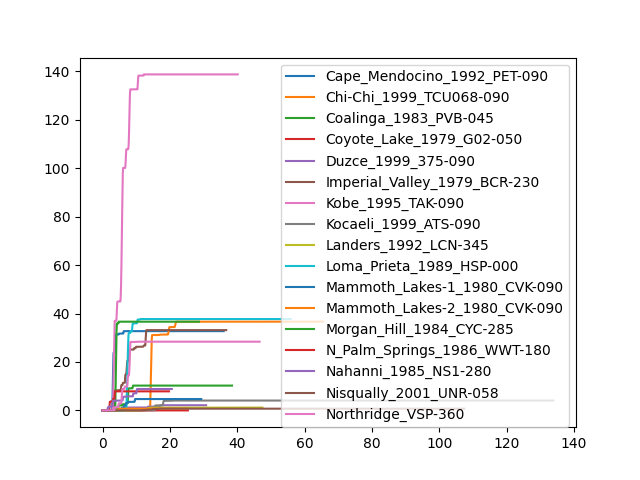

In [17]:
# %%time
fig, ax = plt.subplots()
for name in sorted_histories:
    motion = histories[name]
    dt = motion[0][1] - motion[0][0]
    input_acc = motion[1] / 9.80665
    da = slam.Coupled(k_y=ky,
                        a_in=input_acc,
                        dt=dt,
                        height=50.0,
                        vs_slope=600.0,
                        vs_base=600.0,
                        damp_ratio=0.05,
                        ref_strain=0.0005,
                        soil_model="equivalent_linear",
                        si_units=True,
                        lite=False)
    da.run_sliding_analysis()
    pga = max(abs(input_acc))
    # print(f"{name}: PGA = {pga:.2f}, decoupled disp = {da.block_disp[-1] * 100:.2f}cm")
    print(f"{name}: k_max = {pga:.3f}, eq_Vs = {da._vs_slope:.3f}m/s, damp = {da._damp_tot:.3f}, decoupled disp = {da.block_disp[-1] * 100:.3f}cm")
    ax.plot(motion[0],da.block_disp*100,label=name)
ax.legend()

In [7]:
# plt.close("all")
# # plt.plot(motion[0],motion[1])
# # plt.plot(motion[0],da.a_resp)
# # plt.plot(motion[0],da.HEA)
# # # plt.plot(motion[0],da.block_vel)
# plt.plot(motion[0],da.block_disp)
# plt.title(f"Total displacement: {da.block_disp[-1]*100:.1f}cm")
# 
# plt.show()

In [8]:
import numpy as np

def create_step_function(x, y):
    def step_function(val):
        # Find the index where val would be inserted to maintain order
        idx = np.searchsorted(x, val, side='right') - 1
        # Ensure idx is within the bounds of y
        idx = np.clip(idx, 0, len(y) - 1)
        return y[idx]
    return step_function

# Example usage
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 20, 30, 40, 50])
myfunc = create_step_function(x, y)

for i in [0, 1, 1.5, 2, 3, 3.5, 4, 5, 6]:
    print(f"myfunc({i}) = {myfunc(i)}")

# Test the function
# print(myfunc(3.5))  # Output: 30
# print(myfunc(5))    # Output: 50
# print(myfunc(0))    # Output: 10


myfunc(0) = 10
myfunc(1) = 10
myfunc(1.5) = 10
myfunc(2) = 20
myfunc(3) = 30
myfunc(3.5) = 30
myfunc(4) = 40
myfunc(5) = 50
myfunc(6) = 50


In [9]:
for i in [1,2,3,4,5]:
    prev = i - 2 + (i==1)
    curr = i - 1
    print(i, prev, curr)

1 0 0
2 0 1
3 1 2
4 2 3
5 3 4


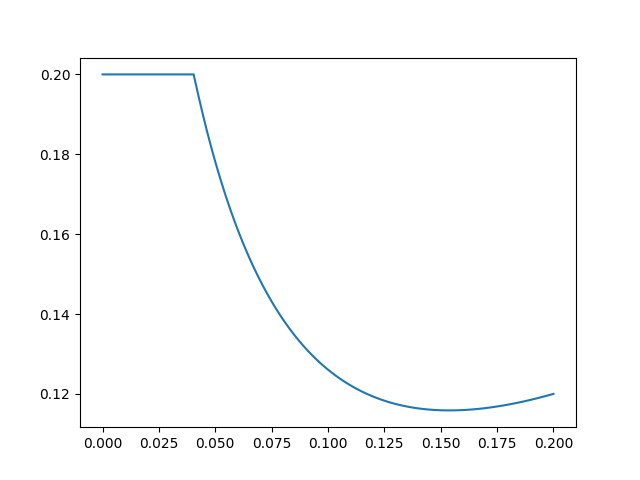

In [10]:
def some_ky_func(disp):
    initial = 0.2
    minimum = 0.05
    factor = 0.005
    exponent = -1.5
    value = max(factor*(disp+minimum)**exponent + 0.4*disp, minimum)
    return min(initial,value)

disp = np.linspace(0, 0.2, 100)
plt.close("all")
plt.plot(disp, [some_ky_func(d) for d in disp])
plt.show()